# import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import os

# Read the data and Knew some information

In [2]:
# Replace 'yourDataset.csv' with your actual dataset filename
df = pd.read_csv(r"Real estate valuation data set.csv", delimiter = ";")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# checking for Null values
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Implement the linear regression algorithm

In [5]:
# Replace 'yourDataset.csv' with your actual dataset filename
df = pd.read_csv(r"Real estate valuation data set.csv", delimiter = ";")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# Define features and target
features = ['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 53.50561912450112
Root Mean Squared Error: 7.314753524521596


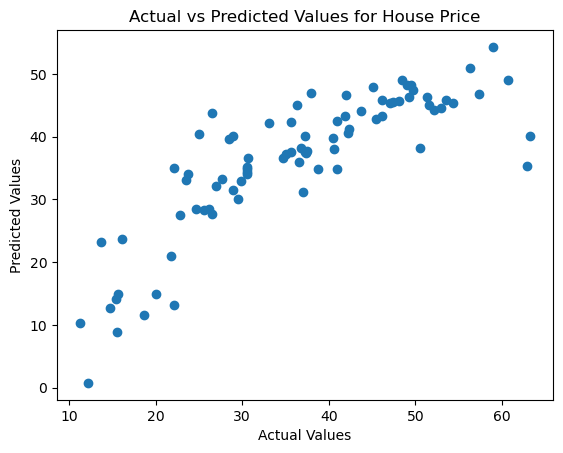

In [8]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for House Price")
plt.show()

# implement the clustering Algorithms

dataset with various columns related to employee absenteeism. Each row represents a record for a specific case. Here's a breakdown of the columns:

ID: Employee ID or case ID.\
Reason for absence: Code indicating the reason for the employee's absence.\
Month of absence: Month in which the absence occurred.\
Day of the week: Day of the week on which the absence occurred.\
Seasons: Season in which the absence occurred (1: Spring, 2: Summer, 3: Fall, 4: Winter).\
Transportation expense: Cost of transportation for the employee.\
Distance from Residence to Work: Distance from the employee's residence to the workplace.\
Service time: Years of service for the employee.\
Age: Age of the employee.\
Workload Average/day: Average workload per day.\
Hit target: Achievement of work target (in percentage).\
Disciplinary failure: Whether the employee had a disciplinary failure (0: No, 1: Yes).\
Education: Level of education (1: High School, 2: Graduate, 3: Postgraduate, 4: Master and Doctor).\
Son: Number of children.\
Social drinker: Whether the employee is a social drinker (0: No, 1: Yes).\
Social smoker: Whether the employee is a social smoker (0: No, 1: Yes).\
Pet: Number of pets.\
Weight: Weight of the employee.\
Height: Height of the employee.\
Body mass index (BMI): BMI of the employee.\
Absenteeism time in hours: Number of hours the employee was absent.\

In [9]:
data = pd.read_csv(r"Absenteeism_at_work.csv", sep=";")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# Apply agglomerative clustering and draw the dendrogram

[739 738 737 736 554 735 733 732 591 524 727 477 725 724 699 722 734 720
 378 721 717 395 731 715 714 419 710 705 657 718 708 706 723 352 707 383
 700 349 698 704 702 697 695 693 696 691 410 694 728 503 347 687 692 685
 686 683 681 690 682 701 680 689 677 675 679 678 674 671 670 684 668 666
 665 669 663 584 661 660 672 658 659 328 655 348 646 499 688 439 656 650
 664 654 647 709 645 552 643 649 651 640 667 371 639 638 635 652 644 633
 637 634 629 350 631 641 495 625 703 510 627 553 475 623 620 619 618 617
 616 615 614 624 611 613 622 612 471 626 520 521 726 719 621 441 551 630
 517 518 550 609 519 516 509 610 511 507 628 549 505 504 403 515 482 496
 493 379 599 607 173 494 384 472 322 506 662 479 512 514 466 467 490 341
 415 548 539 339 608 470 606 533 462 547 235 478 461 642 469 605 445 359
 251 480 455 489 453 673 474 546 604 508 454 444 545 411 238 452 443 442
 220 716 476 247 450 440 481 676 361 465 436 435 451 457 459 429 437 427
 544 543 254 513 425 334 636 502 422 492 491 310 42

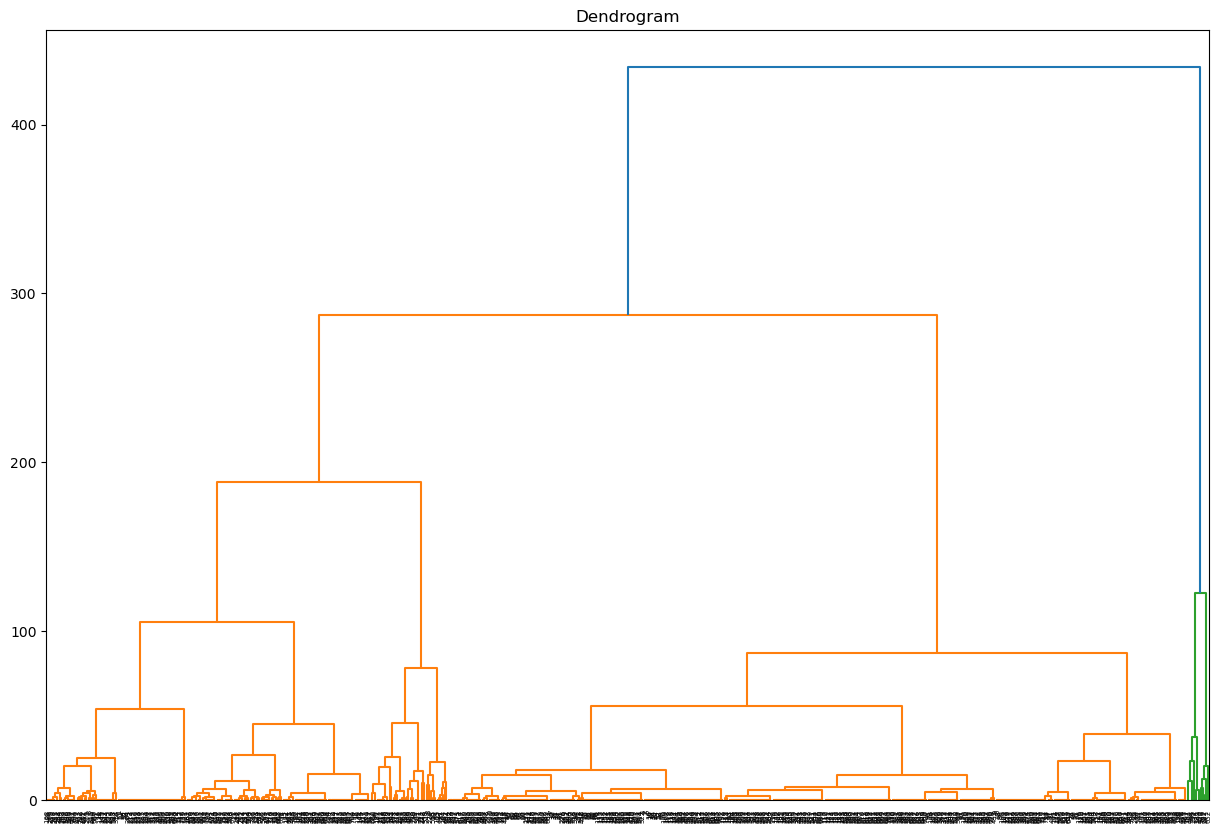

In [10]:
#  This can provide insights into whether certain reasons for absence are associated with specific patterns of absenteeism duration.

data = pd.read_csv(r"Absenteeism_at_work.csv", sep=";")

# data and feature selection
X = data.iloc[:, [1, -1]].values   # Using only two features for simplicity

agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

print(agg_labels)

plt.figure(figsize=(15, 10))
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

 # Use the resulting clusters as initial centroids for the K-Means clustering algorithm.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[ 49   1   2   7   2   2   9  12  13   9  23  23  26  18  12  30   2  34
  26   2  40  18  44  20  48  51  53  20  48   2  48  48  12  48   2  53
  65  67  15  12   2  12  12  77   2  95  95  12   9  87   1   1   2   2
   1   1  96  95   1  53  95  12  95  95   1  53  95  95  95   2   2 113
  47  95 118  30 120  56  53 124  53  53 121  34 113 130   9 133  53 135
  95  34 138  20  85 124 143  95  53 146   2  56   2  56 152   9 124 124
   2   9  45  77   2  53 163 164  48  45   2 120 164  45  45  45  45  45
  45  45  45  48  48  45   2  45 186  53 189  53  23  26 120  47 120   9
  26  23 120   2  53  47 205  48  53  53  77 120  77 212 213   9 121 121
 218  44 220 221 222 121 135 225  20  53  30 231   2  26 234  26 236 138
 238 120 218  85  85  53  85 231  53 120  20 231  53  95  30  85  15 152
  77 265  77 267 268   1 121 120  85  48  77   7 120 277 231   1   1   1
   1  18 231   9  77   9 288  12  40  26  12  40 121 267  53 298   9 300
 120 120 118  23 307  49  56  48 313  23  23 205   

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (126) found smaller than n_clusters (740). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


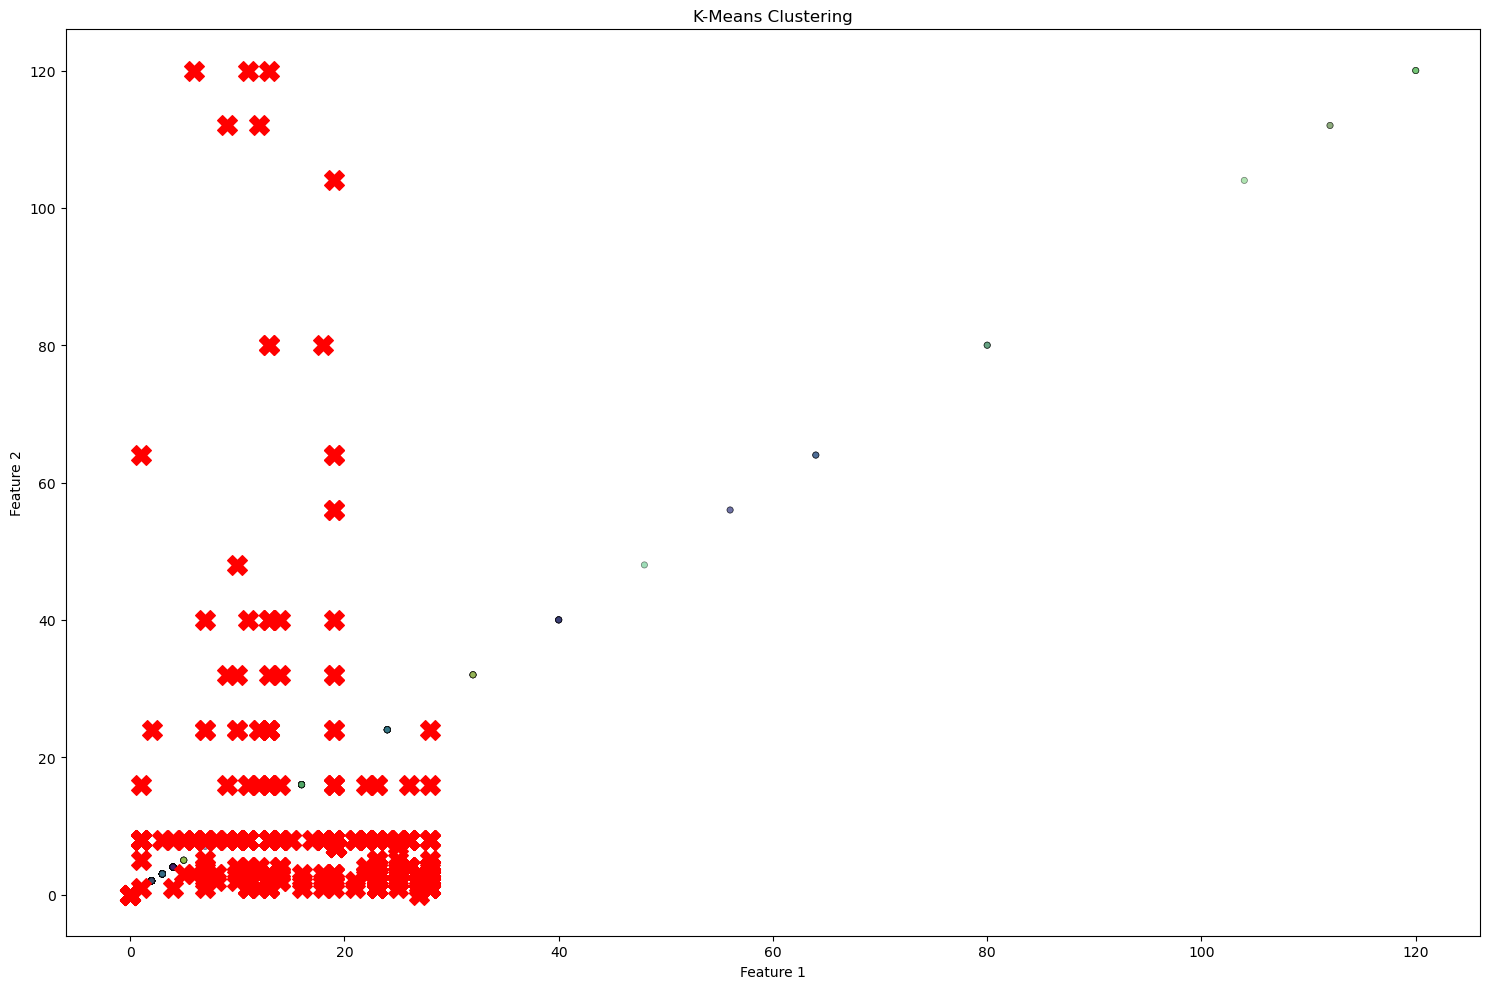

In [11]:
# the goal is to identify groups of instances that share similarities in terms of both the reason for absence and the duration of absenteeism.
#  This can provide insights into whether certain reasons for absence are associated with specific patterns of absenteeism duration.

X = data.iloc[:, [1, -1]].values   # Using only two features for simplicity

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

# Use the output of agglomerative clustering to determine the number of clusters
num_clusters = len(np.unique(agg_labels))


# K-Means with initial centroids from Agglomerative Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_

# The labels are integers ranging from 0 to (n_clusters - 1)
print(kmeans_labels)
print(num_clusters)

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 1], X[:, -1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=20, alpha=0.5, linewidths=0.5)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Agglomerative Clustering and K-Means Clustering together

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (126) found smaller than n_clusters (740). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


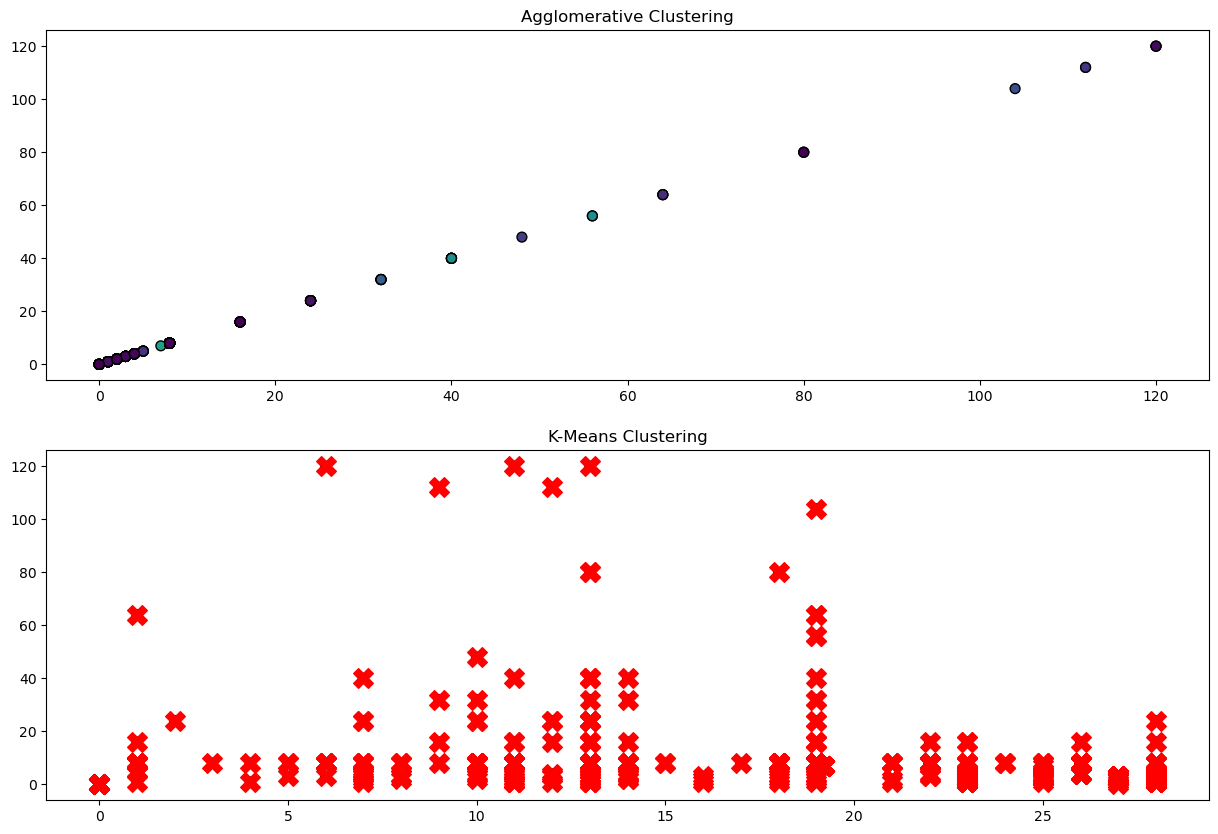

In [12]:
X = data.iloc[:, [1, -1]].values   # Using only two features for simplicity

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

# K-Means with initial centroids from Agglomerative Clustering
kmeans = KMeans(n_clusters=len(np.unique(agg_labels)), init='k-means++', random_state=42)
kmeans.fit(X)

# Plot the results
plt.figure(figsize=(15, 10))

# Plot Agglomerative Clustering results
plt.subplot(2, 1, 1)
plt.scatter(X[:, 1], X[:, -1], c=agg_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering')

# Plot K-Means results
plt.subplot(2, 1, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='K-Means Centroids')
plt.title('K-Means Clustering')

plt.show()

# Evaluate Clustering Models 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wi

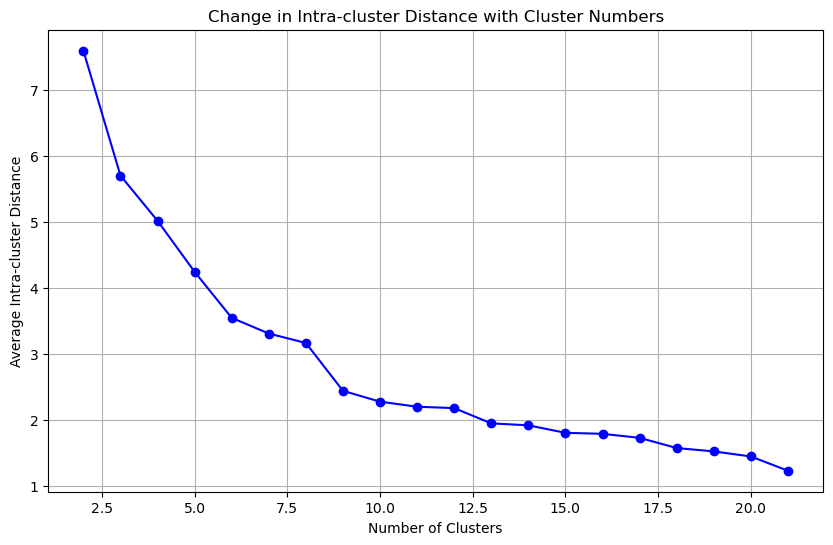

In [16]:
import os
os.environ['JOBLIB_START_METHOD'] = 'forkserver'
os.environ['OMP_NUM_THREADS'] = '3'

X = data.iloc[:, [1, -1]].values   # Using only two features for simplicity

# Calculate and visualize intra-cluster distance for different cluster numbers
cluster_numbers = range(2, 22)  
intra_cluster_distances = []

for num_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=num_clusters, n_init=1, random_state=42)  
    kmeans.fit(X)
    intra_cluster_distances.append(np.mean(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))

# Visualize the change in intra-cluster distance
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, intra_cluster_distances, marker='o', linestyle='-', color='b')
plt.title('Change in Intra-cluster Distance with Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Intra-cluster Distance')
plt.grid(True)
plt.show()

# Implement a For Loop with a Stop Condition

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wi

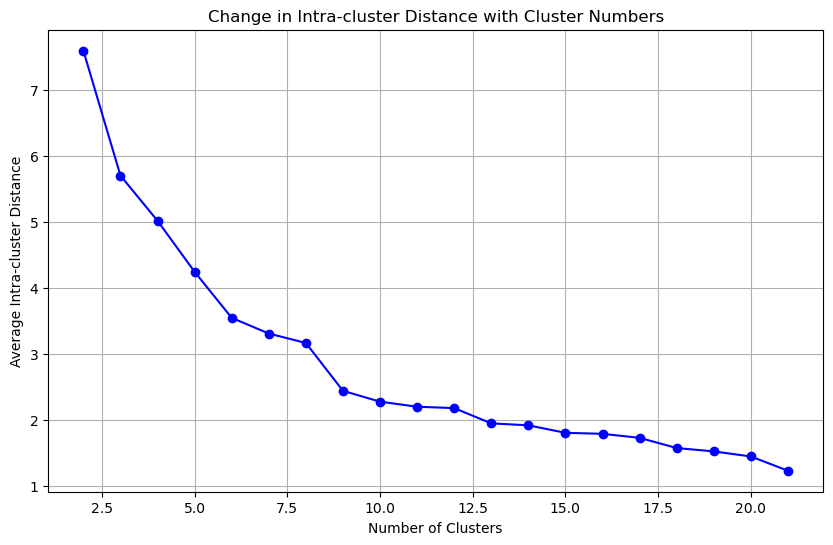

In [14]:
import os
os.environ['JOBLIB_START_METHOD'] = 'forkserver'
os.environ['OMP_NUM_THREADS'] = '3'

X = data.iloc[:, [1, -1]].values   # Using only two features for simplicity

# Initialize variables for the loop
max_iterations = 20
threshold = 0.001  
prev_intra_cluster_distance = float('inf')

# Calculate and visualize intra-cluster distance for different cluster numbers
cluster_numbers = range(2, max_iterations + 2)  
intra_cluster_distances = []

for num_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=num_clusters, n_init=1, random_state=42)  
    kmeans.fit(X)
    intra_cluster_distance = np.mean(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
    intra_cluster_distances.append(intra_cluster_distance)

    # Check if the change in intra-cluster distance is below the threshold
    if abs(prev_intra_cluster_distance - intra_cluster_distance) < threshold:
        print(f"Stopping at {num_clusters} clusters due to stabilization.")
        break
    
    prev_intra_cluster_distance = intra_cluster_distance

# Visualize the change in intra-cluster distance
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, intra_cluster_distances, marker='o', linestyle='-', color='b')
plt.title('Change in Intra-cluster Distance with Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Intra-cluster Distance')
plt.grid(True)
plt.show()
